In [11]:
# 1. Librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# 2. Cargar datos
df = pd.read_csv("../data_sintetica/clientes_tienda_virtual.csv")

In [12]:
# 3. Features y target
X = df[['grupo_edad', 'region', 'nivel_ingresos', 'horas_conectado', 'clics_en_productos', 'uso_cupones']]
y = df['compra_realizada']

cat_cols = ['grupo_edad', 'region', 'nivel_ingresos']
num_cols = ['horas_conectado', 'clics_en_productos', 'uso_cupones']

In [13]:
# 4. Pipeline
preprocessor = ColumnTransformer([
    ('cat', OneHotEncoder(drop='first'), cat_cols)
], remainder='passthrough')

pipeline = Pipeline([
    ('preprocessing', preprocessor),
    ('classifier', DecisionTreeClassifier(max_depth=5, random_state=42))
])

In [14]:
# 5. Split y entrenamiento
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
pipeline.fit(X_train, y_train)

,steps,"[('preprocessing', ...), ('classifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('cat', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [15]:
# 6. Predicción y métricas
y_pred = pipeline.predict(X_test)

print("Reporte de Clasificación:")
print(classification_report(y_test, y_pred))

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.57      0.72      0.64      1565
           1       0.58      0.42      0.48      1435

    accuracy                           0.57      3000
   macro avg       0.58      0.57      0.56      3000
weighted avg       0.58      0.57      0.56      3000



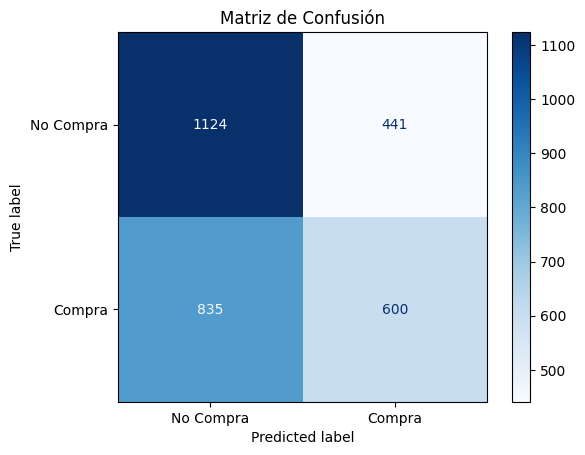

In [16]:
# 7. Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Compra", "Compra"])
disp.plot(cmap="Blues")
plt.title("Matriz de Confusión")
plt.show()

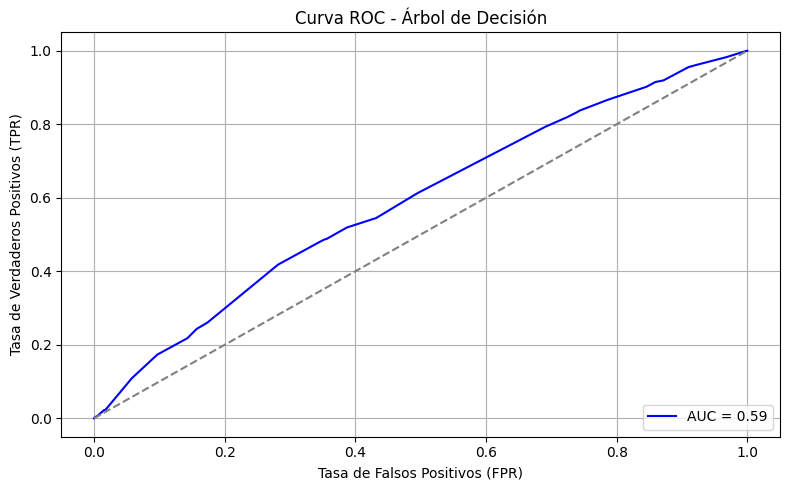

In [17]:
# 8. Curva ROC
# Probabilidades del modelo para la clase "Compra" (1)
y_prob = pipeline.predict_proba(X_test)[:, 1]

# Calcular curva ROC
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Graficar curva ROC
plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}', color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("Tasa de Falsos Positivos (FPR)")
plt.ylabel("Tasa de Verdaderos Positivos (TPR)")
plt.title("Curva ROC - Árbol de Decisión")
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

In [18]:
# 9. Validación cruzada
scores = cross_val_score(pipeline, X, y, cv=5, scoring='accuracy')
print(f"Accuracy por fold: {np.round(scores, 3)}")
print(f"Accuracy promedio (CV): {scores.mean():.2f}")

Accuracy por fold: [0.571 0.583 0.573 0.575 0.576]
Accuracy promedio (CV): 0.58


In [19]:
# 10. Guardar predicciones
resultados = pd.DataFrame({'real': y_test, 'predicho': y_pred})
resultados.to_csv(os.path.join("..", "resultados_modelos", "clasificacion", "prediccion_arbol_de_decisión.csv"), index=False)

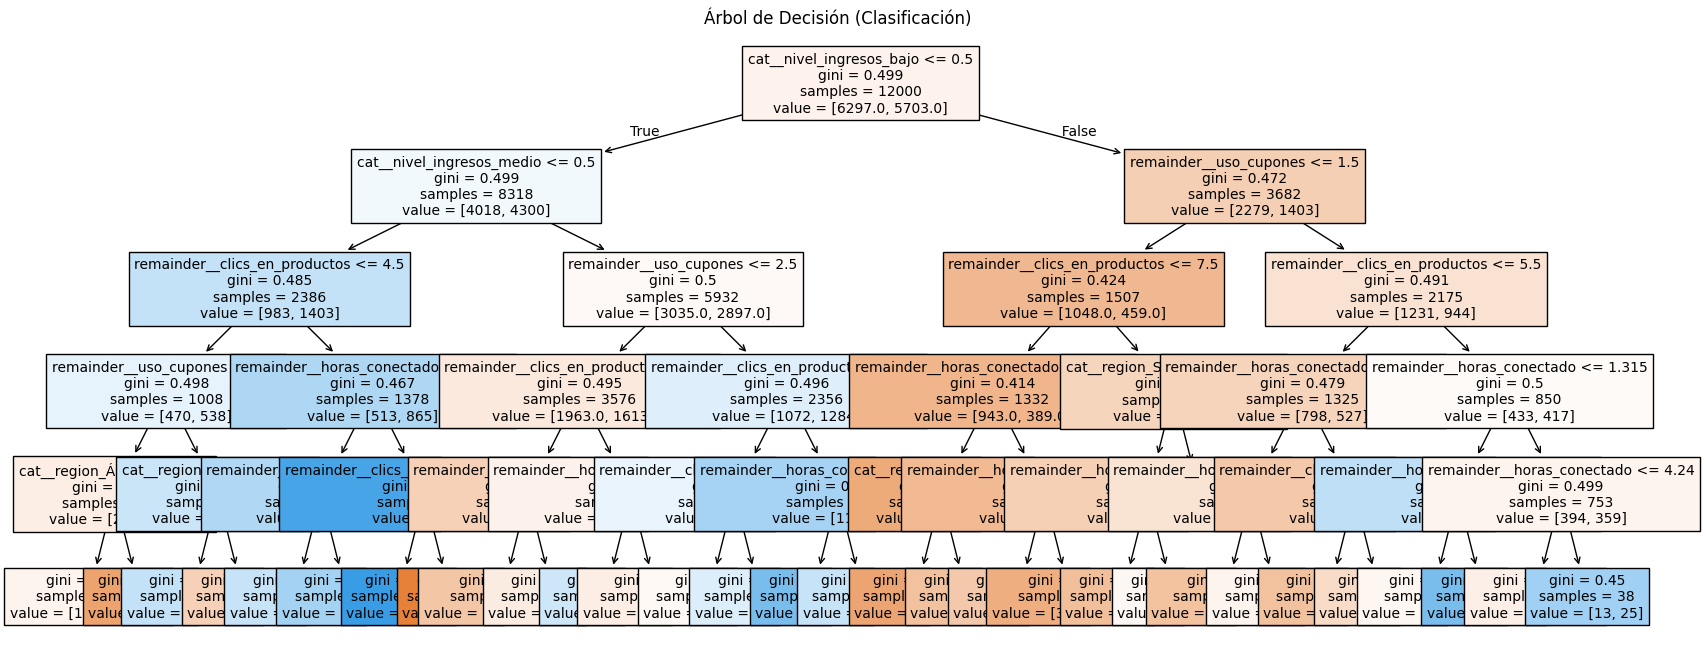

In [20]:
# 10 Visualización del árbol
clf = pipeline.named_steps['classifier']
plt.figure(figsize=(20, 8))
plot_tree(clf, filled=True, fontsize=10, feature_names=pipeline.named_steps['preprocessing'].get_feature_names_out())
plt.title("Árbol de Decisión (Clasificación)")
plt.show()